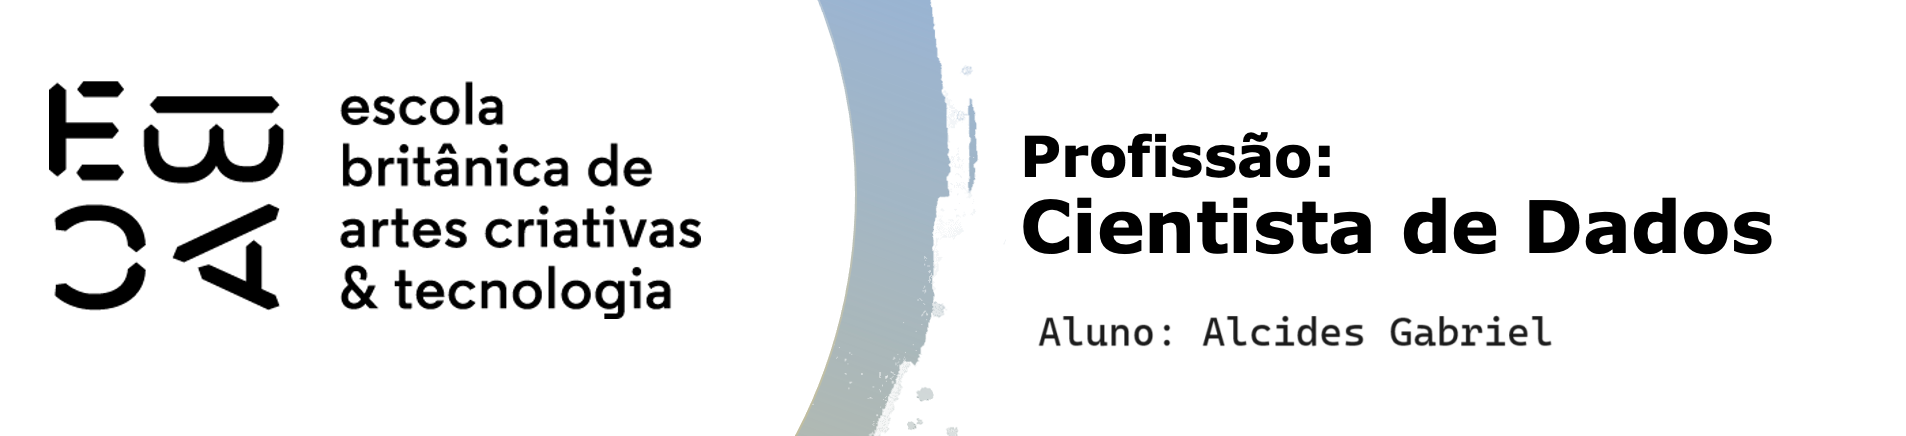

Módulo 21 <br> Professor: Lucas Serra 

# Módulo 21 - Atividade 3

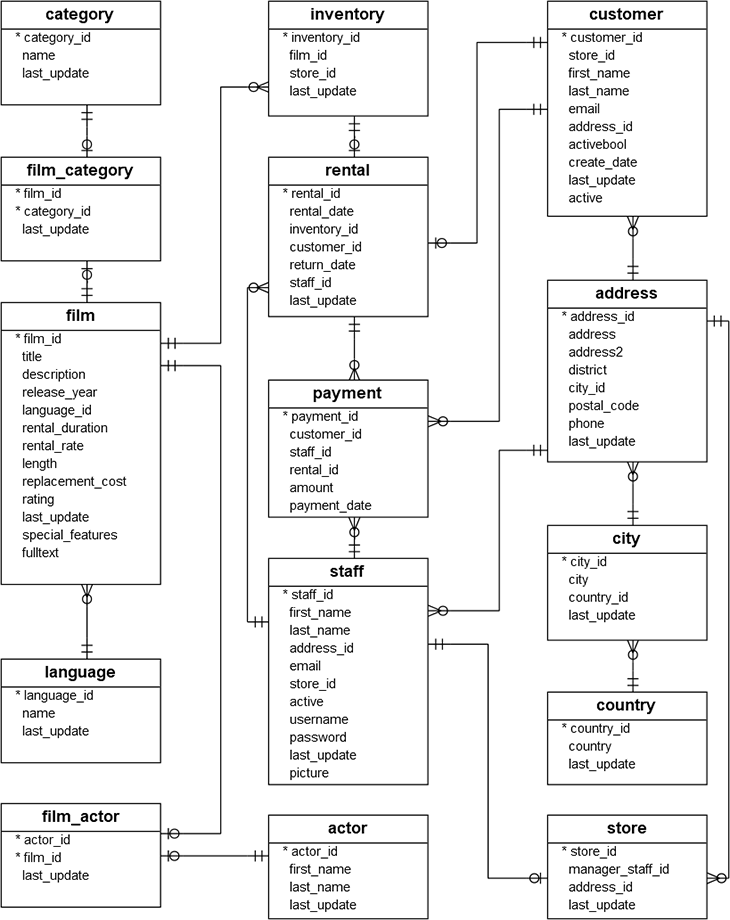

### Calcule a média por nome e sobrenome do ator da seguintes variáveis:
- rental_duration
- rental_rate
- length
- replacement_cost

In [3]:
import pandas as pd
import psycopg2 as pg2

In [18]:
def get_data_mean():
    conn = pg2.connect(host='localhost', port=5432, dbname='dvdrrental', user='postgres',password='senha123')
    cur = conn.cursor()
    cur.execute("""SELECT *
                    FROM film
                    LEFT JOIN film_actor
                    ON film.film_id = film_actor.film_id
                    LEFT JOIN actor
                    ON actor.actor_id = film_actor.actor_id""")
    data = cur.fetchall()
    col = [desc.name for desc in cur.description]
    data = pd.DataFrame(data, columns=col)
    cur.close()
    conn.close()
    
    return data

In [20]:
df = get_data_mean()
df.groupby(['first_name','last_name'])[['rental_duration', 'rental_rate', 'length','replacement_cost']].mean()

rental_duration rental_rate      length replacement_cost
first_name last_name                                                          
Adam       Grant             5.277778    2.767778  122.388889        22.934444
           Hopper            4.863636    2.808182  112.272727            19.49
Al         Garland           5.115385    2.759231  106.384615        19.874615
Alan       Dreyfuss          5.037037    2.841852  111.296296         19.36037
Albert     Johansson         5.060606     3.29303  126.636364        22.474848
...                               ...         ...         ...              ...
Will       Wilson            5.064516    3.054516  115.967742        19.957742
William    Hackman           4.777778    3.138148  129.074074        20.064074
Woody      Hoffman           4.580645        2.99  120.838710        19.699677
           Jolie             4.354839    2.602903  114.935484        19.409355
Zero       Cage              4.840000        2.83  113.240000            19.91

[199 rows x 4 columns]

### Calcule a soma de amount (preço total do aluguel) por nome, sobrenome e email do cliente (customer) e indique os 10 clientes que mais gastaram e os 10 que menos gastaram.


In [21]:
def get_data_mean():
    conn = pg2.connect(host='localhost', port=5432, dbname='dvdrrental', user='postgres',password='senha123')
    cur = conn.cursor()
    cur.execute("""SELECT * 
                    FROM customer
                    LEFT JOIN payment
                    USING (customer_id)""")
    data = cur.fetchall()
    col = [desc.name for desc in cur.description]
    data = pd.DataFrame(data, columns=col)
    cur.close()
    conn.close()
    
    return data

In [23]:
df = get_data_mean()
df.groupby(['first_name','last_name','email'])[['amount']].sum()

,,,amount
first_name,last_name,email,
Aaron,Selby,aaron.selby@sakilacustomer.org,88.80
Adam,Gooch,adam.gooch@sakilacustomer.org,97.80
Adrian,Clary,adrian.clary@sakilacustomer.org,68.82
Agnes,Bishop,agnes.bishop@sakilacustomer.org,86.79
Alan,Kahn,alan.kahn@sakilacustomer.org,119.75
...,...,...,...
Willie,Markham,willie.markham@sakilacustomer.org,85.78
Wilma,Richards,wilma.richards@sakilacustomer.org,91.80
Yolanda,Weaver,yolanda.weaver@sakilacustomer.org,102.75
